In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Data Visualization

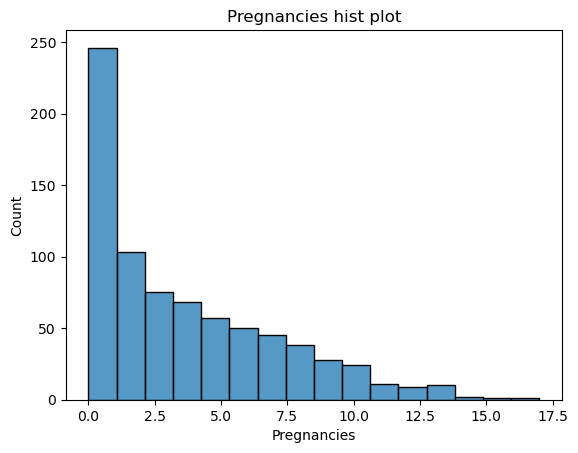

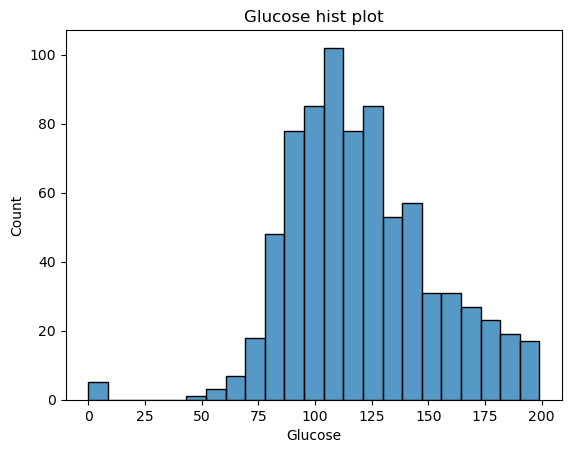

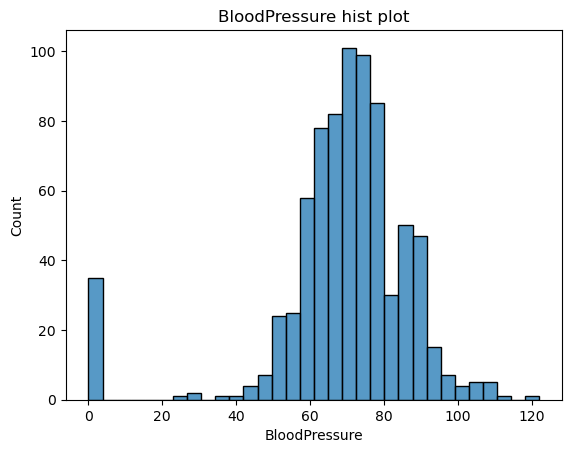

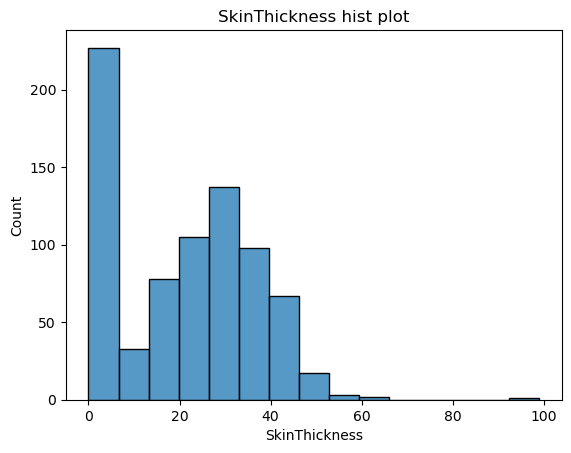

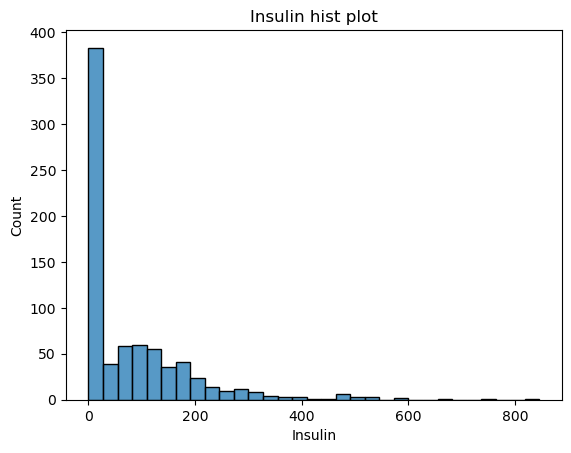

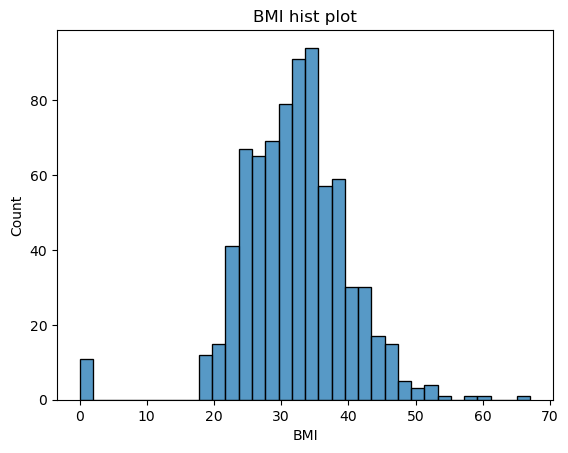

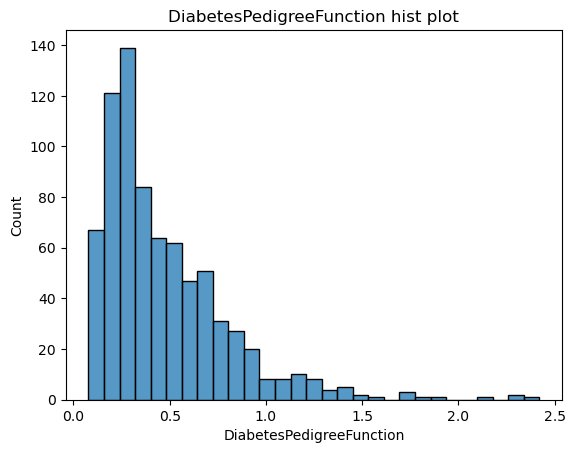

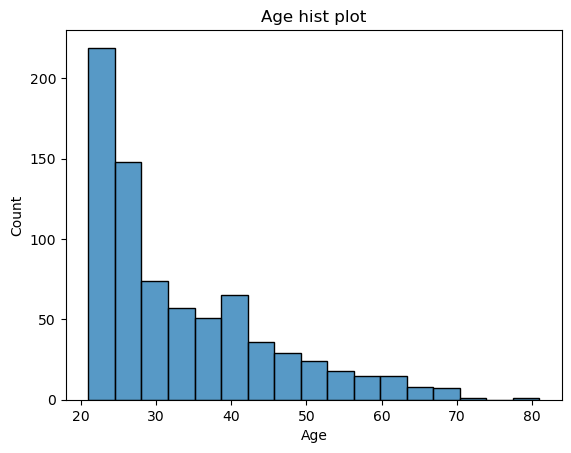

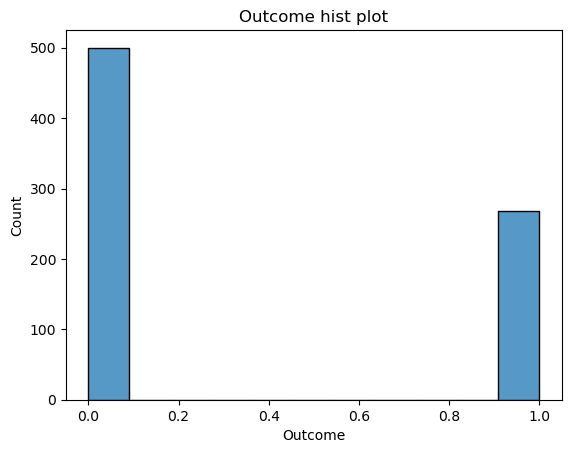

In [7]:
for col in df.columns:
    plt.figure()
    sns.histplot(df[col])
    plt.title(f'{col} hist plot')

# Remove outlier using IQR

In [8]:
cols=['Insulin','SkinThickness']
for col in cols:
    df[col]=df[col].replace({0:df[col].mean()})

In [9]:
def remove_outlier (df):
    for col in df.columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_limit=Q1-1.5*IQR
        upper_limit=Q3+1.5*IQR
        print(f'{col}:\n lower_limit:{lower_limit}\n upper_limit:{upper_limit}')
        df=df[(df[col]>lower_limit) &( df[col]<upper_limit)]
    return df
              

In [10]:
df=remove_outlier(df)

Pregnancies:
 lower_limit:-6.5
 upper_limit:13.5
Glucose:
 lower_limit:37.5
 upper_limit:201.5
BloodPressure:
 lower_limit:35.0
 upper_limit:107.0
SkinThickness:
 lower_limit:1.8411458333333321
 upper_limit:51.6953125
Insulin:
 lower_limit:-1.8763020833333286
 upper_limit:215.92578125
BMI:
 lower_limit:13.449999999999998
 upper_limit:49.050000000000004
DiabetesPedigreeFunction:
 lower_limit:-0.29124999999999995
 upper_limit:1.13475
Age:
 lower_limit:0.0
 upper_limit:64.0
Outcome:
 lower_limit:-1.5
 upper_limit:2.5


In [11]:
df.shape

(581, 9)

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
5,5,116,74,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


# Data Splitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [15]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.8,random_state=1)

# Model building

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model=LogisticRegression()

In [18]:
model.fit(X_train,y_train)

C:\Users\86173\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model.score(X_test,y_test)

0.7435897435897436

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
predictions=model.predict(X_test)

In [22]:
cm=confusion_matrix(y_test,predictions)

In [23]:
cm

array([[71,  8],
       [22, 16]], dtype=int64)

<Axes: >

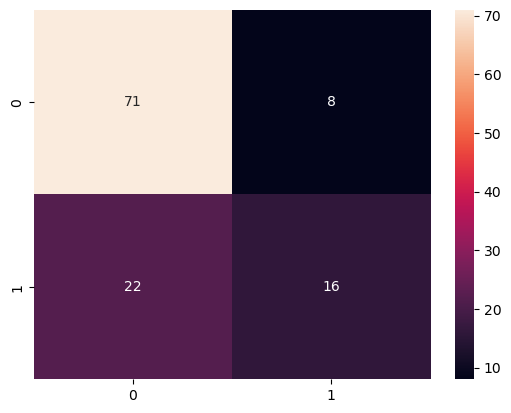

In [24]:
sns.heatmap(cm, annot=True)

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        79
           1       0.67      0.42      0.52        38

    accuracy                           0.74       117
   macro avg       0.72      0.66      0.67       117
weighted avg       0.73      0.74      0.73       117

